In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [98]:
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
    'BMI', 'DiabetesPedigree', 'Age', 'Outcome'
]
df = pd.read_csv('pima-indians-diabetes.csv', names = column_names , header= None, skiprows = 9)


In [99]:
df = df[pd.to_numeric(df['Pregnancies'], errors='coerce').notnull()]

# Reset index after dropping the rows
df.reset_index(drop=True, inplace=True)

# Check the cleaned dataframe
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


In [100]:
# Features (X) - All columns except the last one (Outcome)
X = df.iloc[:, :-1]

# Target (y) - The last column (Outcome)
y = df.iloc[:, -1]

# Check the first few rows of features and target
print(X.head())
print(y.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  
0             0.627   50  
1             0.351   31  
2             0.672   32  
3             0.167   21  
4             2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [104]:
y_pred = model.predict(X_test)


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}")

Accuracy: 76.6234


In [107]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79 20]
 [16 39]]


In [108]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



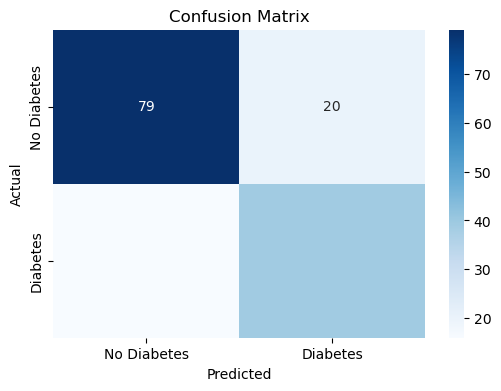

In [115]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


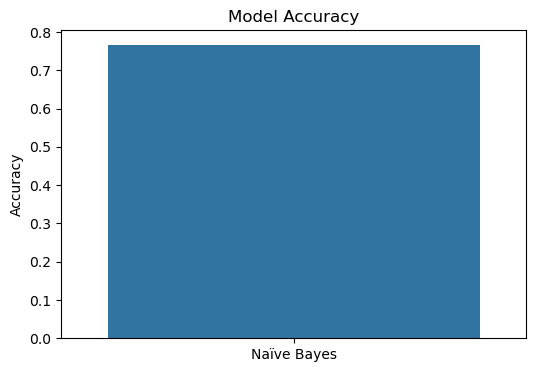

In [110]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Naïve Bayes'], y=[accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()